In [564]:
from typing import Callable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = '16'

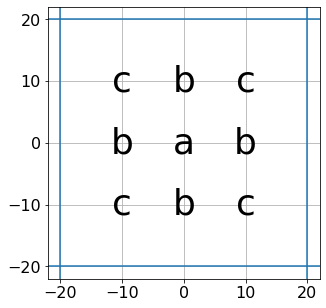

In [565]:
# Quiz 1
plt.figure(figsize=(5,5))
plt.axhline(-20)
plt.axhline(+20)
plt.axvline(-20)
plt.axvline(+20)
plt.gca().set_aspect('equal')
ticks = range(-20, 30, 10)
plt.xticks(ticks), plt.yticks(ticks)
add_text = lambda x,y,s: plt.text(x,y,s,size=36,ha='center',va='center')
add_text(0,0,'a')
for xy in [[0,10],[0,-10],[10,0],[-10,0]]:
    add_text(xy[0],xy[1],'b')
for xy in [[-10,-10],[-10,10],[10,-10],[10,10]]:
    add_text(xy[0],xy[1],'c')
plt.grid()
plt.show()

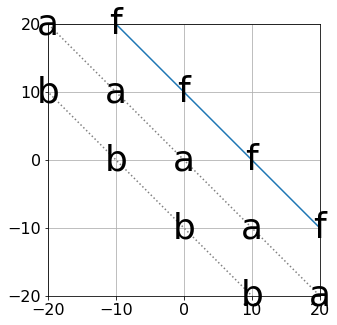

In [566]:
# Quiz 2
x = np.linspace(-30,30,10)
y = -x + 10
plt.figure(figsize=(5,5))
plt.plot(x, y)
plt.plot(x, y-10, ':', color='grey')
plt.plot(x, y-20, ':', color='grey')
plt.gca().set_aspect('equal')
ticks = range(-20, 30, 10)
plt.xticks(ticks), plt.yticks(ticks)
add_text = lambda x,y,s: plt.text(x,y,s,size=36,ha='center',va='center')
for xy in [[-10,20],[0,10],[10,0],[20,-10]]:
    add_text(xy[0],xy[1],'f')
for xy in [[-20,10],[-10,0],[0,-10],[10,-20]]:
    add_text(xy[0],xy[1],'b')
for xy in [[-20,20],[-10,10],[0,0],[10,-10],[20,-20]]:
    add_text(xy[0],xy[1],'a')

plt.xlim([-20,20]), plt.ylim([-20,20])
plt.grid()
plt.show()

In [567]:
# ellipse function and specific version for the quiz
def ellipse(x, y, c_x = 0.0, c_y = 0.0, a_x = 1.0, a_y = 1.0):
    # c_x, c_y: center
    # a_x, a_y: 
    return ((x - c_x)/a_x)**2 + ((y - c_y)/a_y)**2

ellipse_quiz = lambda x, y: ellipse(x, y, 2.5, 2.5, 30.0, 40.0)


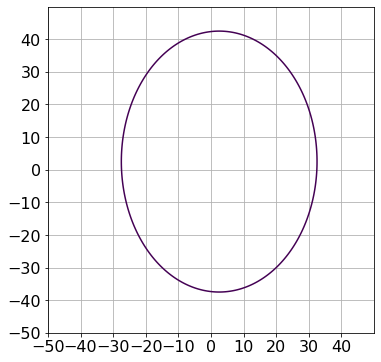

In [568]:
# check
x = np.linspace(-50.0, 50.0, 201)
y = x.copy()
mtx_x, mtx_y = np.meshgrid(x, y)
mtx_z = ellipse_quiz(mtx_x, mtx_y)

### check with figure
# grids
g_x = np.arange(-50,50,10)
g_y = g_x.copy()
# figure
plt.figure()
plt.contour(x, y, mtx_z, levels = [1.0])
plt.xticks(g_x), plt.yticks(g_y)
plt.grid()
plt.gca().set_aspect('equal')
plt.xlim([-50, 50]), plt.ylim([-50, 50])
plt.show()

In [569]:
# check whether the grid points are exactly on the ellipse (which will be an issue later to solve quiz)
# they are not 
mtx_zg = ellipse_quiz(*(np.meshgrid(g_x, g_y)))
print('value closest to ellipse: ', np.min(np.abs(mtx_zg - 1.0)))

value closest to ellipse:  0.00043402777777790114


# Drunken Ant

In [570]:
# possible moves (dx)
p_dx = np.array([[-10.0, 0.0], [10.0, 0.0], [0.0, -10.0], [0.0, 10.0]])

def path_until_exit(rng: np.random.Generator, is_inside: Callable[[float,float], bool]):
    X = np.array([0,0])
    aX = [X]
    n = 0
    while is_inside(X[0], X[1]):
        dx = p_dx[rng.integers(0, 4)]
        X = X + dx
        n += 1
        aX.append(X)

    return n, np.array(aX)

# define my random number generator
my_rng = np.random.default_rng(234)
is_inside_quiz = lambda x, y: ellipse_quiz(x,y) < 1.0
n_exit, X_path = path_until_exit(my_rng, is_inside_quiz)

# test
print('steps to exit', n_exit)
for n, X in enumerate(X_path):
    print(n, X, ellipse_quiz(*X))

steps to exit 7
0 [0. 0.] 0.010850694444444444
1 [10.  0.] 0.06640625
2 [10. 10.] 0.09765625
3 [20. 10.] 0.37543402777777785
4 [30. 10.] 0.8754340277777777
5 [20. 10.] 0.37543402777777785
6 [30. 10.] 0.8754340277777777
7 [30. 20.] 1.0316840277777777


In [571]:
# other test functions
def is_inside_rectangle(x, y, x_l, x_r, y_l, y_r):
    return (x > x_l) & (x < x_r) & (y > y_l) & (y < y_r)
is_inside_rectangle_quiz = lambda x, y: is_inside_rectangle(x, y, -15.0, 15.0, -15.0, 15.0)
path_until_exit(my_rng, is_inside_rectangle_quiz)

(10,
 array([[ 0.,  0.],
        [10.,  0.],
        [10., 10.],
        [10.,  0.],
        [ 0.,  0.],
        [ 0., 10.],
        [ 0.,  0.],
        [ 0., 10.],
        [10., 10.],
        [ 0., 10.],
        [ 0., 20.]]))

# Run simulation

In [572]:
def run_experiment(rng, is_inside, num_scens_in_blk, num_blocks, tol_abs = 1e-2, tol_rel = 1e-2):

    avg_exit_by_blk = []
    avg_exit_cum = []
    
    for b in range(num_blocks):

        n_exits = []

        for s in range(num_scens_in_blk):
            n_exit, X_path = path_until_exit(rng, is_inside)
            n_exits.append(n_exit)
        
        avg_exit_by_blk.append(np.mean(n_exits))
        avg_exit_cum.append(np.mean(avg_exit_by_blk))

        if b == 0:
            continue
        
        chg_abs = np.abs(avg_exit_cum[b] - avg_exit_cum[b-1])
        chg_rel = chg_abs / ( avg_exit_cum[b-1] + tol_abs)
        if (chg_abs < tol_abs) & (chg_rel < tol_rel):
            print('convergence condition met at ', b, '-th block')
            print('abs change', chg_abs, ', rel change', chg_rel)
            break

    return np.array(avg_exit_by_blk), np.array(avg_exit_cum)

my_rng = np.random.default_rng(234)



## run simulation and plot

convergence condition met at  16 -th block
abs change 0.0006433823529405913 , rel change 4.577258766034879e-05
estimate:  14.05570588235294


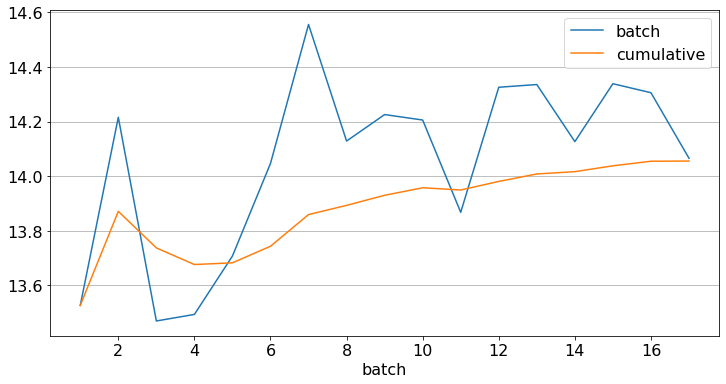

In [574]:
# run simulation
num_scens_in_blk = 1000
num_blocks = 100
tol_abs, tol_rel = 1e-3, 1e-3

is_inside = is_inside_quiz
avg_exit_by_blk, avg_exit_cum = run_experiment(my_rng, is_inside, num_scens_in_blk, num_blocks, tol_abs, tol_rel)
print('estimate: ', avg_exit_cum[-1])

# plot the convergence
blk_idx = np.arange(avg_exit_by_blk.size) + 1
plt.figure()
plt.plot(blk_idx, avg_exit_by_blk, label='batch')
plt.plot(blk_idx, avg_exit_cum, label='cumulative')
plt.xlabel('batch')
plt.grid(axis='y')
plt.legend()
plt.show()

# Check with the first quiz
The answer should be 4.5

convergence condition met at  16 -th block
abs change 0.0006764705882353894 , rel change 0.00014994360816477653
estimate:  4.511176470588236


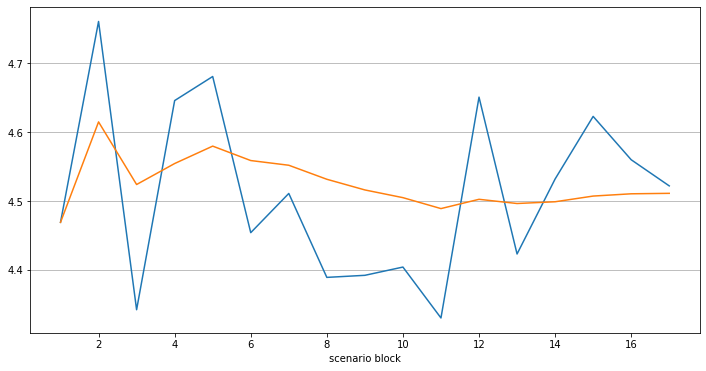

In [446]:
# run simulation
num_scens_in_blk = 1000
num_blocks = 100
tol_abs, tol_rel = 1e-3, 1e-3

is_inside = is_inside_rectangle_quiz
avg_exit_by_blk, avg_exit_cum = run_experiment(my_rng, is_inside, num_scens_in_blk, num_blocks, tol_abs, tol_rel)
print('estimate: ', avg_exit_cum[-1])

# plot the convergence
blk_idx = np.arange(avg_exit_by_blk.size) + 1
plt.figure()
plt.plot(blk_idx, avg_exit_by_blk)
plt.plot(blk_idx, avg_exit_cum)
plt.xlabel('scenario block')
plt.grid(axis='y')
plt.show()

In [447]:
# Pascal's triange
def pascal_triange(M):
    T = np.zeros((M, M), dtype=int)
    T[:,0] = 1.0
    #np.fill_diagonal(T, 1.0)
    for r in range(1, M):
        for c in range(1, r+1):
            T[r,c] = T[r-1,c-1] + T[r-1, c]
    return T

M = 10
T = pascal_triange(M)
T_pad = np.hstack([np.zeros((M,1), dtype=int), T, np.zeros((M,2),dtype=int)])
T_pad = np.vstack([np.zeros((1,M+3), dtype=int), T_pad])

C = T_pad[:,1:] - T_pad[:,:-1]
C

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,  -1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,  -1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1,  -1,  -1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   2,   0,  -2,  -1,   0,   0,   0,   0,   0,   0,   0],
       [  1,   3,   2,  -2,  -3,  -1,   0,   0,   0,   0,   0,   0],
       [  1,   4,   5,   0,  -5,  -4,  -1,   0,   0,   0,   0,   0],
       [  1,   5,   9,   5,  -5,  -9,  -5,  -1,   0,   0,   0,   0],
       [  1,   6,  14,  14,   0, -14, -14,  -6,  -1,   0,   0,   0],
       [  1,   7,  20,  28,  14, -14, -28, -20,  -7,  -1,   0,   0],
       [  1,   8,  27,  48,  42,   0, -42, -48, -27,  -8,  -1,   0]])

In [475]:
np.any([True, True, False])

True

In [479]:
if [1] is not None:
    print('hi')

hi


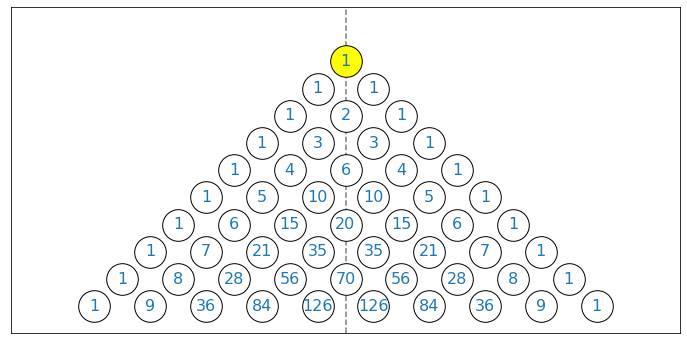

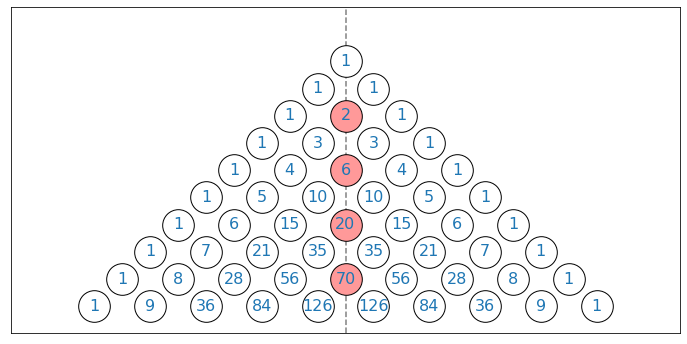

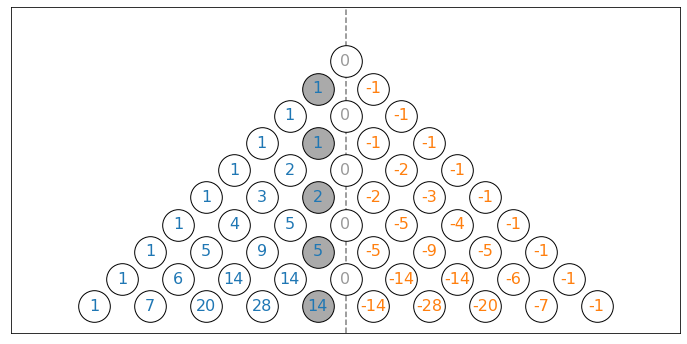

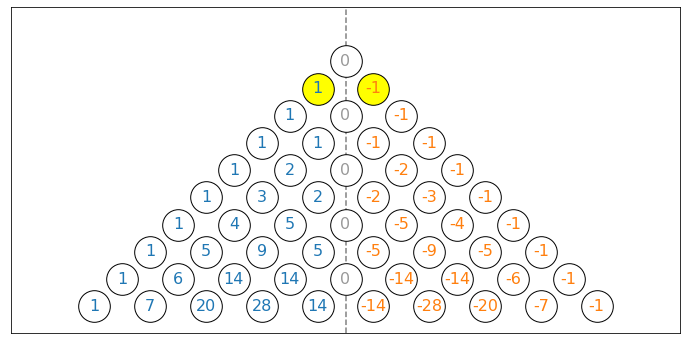

In [530]:
x = np.arange(0, T_pad.shape[1])

def plot_triangle(TT, shift_x=0, shift_y=0, shift_x_rel = 0.5, tocolor = None, color = 'yellow', reverse_sign=False, vlines =[0.0]) -> plt.Figure:
    fig = plt.figure()
    for idx_r, row in enumerate(TT):
        for idx_c in range(idx_r+1):
            idx_c_s = idx_c
            v = row[idx_c_s]
            
            x_loc = x[idx_c] - shift_x_rel * idx_r + shift_x
            y_loc = - idx_r + shift_y
            fc = 'white'
            if tocolor is not None:
                for tc in tocolor:
                    if (np.abs(tc[0]-x_loc) + np.abs(tc[1]-y_loc)) < 0.1:
                        fc = color
                        continue

            
            plt.scatter(x_loc, y_loc, marker='o', s=1000, facecolor=fc, edgecolors='k')
            vv = -v if reverse_sign else v

            fc = '#999999'
            if vv < - 0.1:
                fc = '#ff7f0e'
            if vv > 0.1:
                fc = '#1f77b4'
            
            plt.text(x_loc, y_loc, str(vv), color=fc, fontsize=16, ha='center', va='center')
    #plt.tight_layout()
    plt.ylim([-(M+1), 1])
    plt.xlim([0-shift_x_rel*M-1, M - shift_x_rel*M+1])
    #plt.gca().set_aspect('equal')
    plt.xticks([]), plt.yticks([])
    for vline in vlines:
        plt.axvline(vline, linestyle = '--', zorder = -1, color=np.ones(3)*0.5)
    plt.show()

plot_triangle(T, 0.0, -1, tocolor=[[0,-1]])
plot_triangle(T, 0.0, -1, tocolor=[[0,-3], [0,-5], [0,-7], [0,-9]], color='#ff9999')
#plot_triangle(T_pad[:,1:], tocolor=[[-0.5, -1]], vlines=[-0.5])
#plot_triangle(T_pad[:,:-1], tocolor=[[0.5, -1]], vlines=[0.5], reverse_sign=True)
plot_triangle(C[:-1,:], 0.0, -1, tocolor=[[-0.5, -2],[-0.5, -4],[-0.5, -6],[-0.5, -8],[-0.5, -10]], color='#aaaaaa', vlines = [0.0])
plot_triangle(C[:-1,:], 0.0, -1, tocolor=[[0.5, -2], [-0.5, -2]], vlines = [0.0])

